<a href="https://colab.research.google.com/github/Fahreiza/Machine_learning_2025/blob/main/QUIZ1_2341720207_Fahreiza_Taura_Muhammadani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this Quiz #1 you need to perform exploratory data analysis (EDA) and preprocessing using "Census Income" dataset. The dataset is tabular data which has several missing value in some variables. Moreover, you may need to adjust the name of variables (if needed).

To guide you through this task, some code has beed provided including, download the data, loading the data, and metadata inspection.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Part 1 - Data Loading dan Data Imputation

## Task 1 (5 points)
1.   Do inspection to get the information about dataset
2.   **Which variable(s)** has **missing values**? **How many is it**?



In [28]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

# Get information about the dataset
df.info()

# Check for missing values and their counts
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])

print("\nChecking for '?' values (common missing value representation in this dataset):")
question_mark_counts = {}
for column in df.columns:
    if df[column].dtype == 'object':
        count = (df[column] == '?').sum()
        if count > 0:
            question_mark_counts[column] = count

print("Variables with '?' values:")
for col, count in question_mark_counts.items():
    print(f"{col}: {count} missing values")

print("\nAnswer:")
print("Variables with missing values: workclass, occupation, native-country")
print("Total missing values:")
for col, count in question_mark_counts.items():
    print(f"- {col}: {count} missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

Missing values per column:
Series([], dtype: int64)

Checking for '?' values (common missing

## Task 2 (5 points)
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [27]:

# ===== TASK 2: DATA IMPUTATION =====
print("\n===== TASK 2: DATA IMPUTATION =====")

# Replace '?' with NaN first for proper handling
df_cleaned = df.replace('?', np.nan)

# Check missing values after replacement
print("Missing values after replacing '?' with NaN:")
missing_after_replace = df_cleaned.isnull().sum()
print(missing_after_replace[missing_after_replace > 0])

# Impute missing values
# For categorical variables, use mode (most frequent value)
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode: '{mode_value}'")

# Verify no missing values remain
print("\nMissing values after imputation:")
final_missing = df_cleaned.isnull().sum()
print("Any remaining missing values:", final_missing.sum())
if final_missing.sum() == 0:
    print("✓ All missing values have been successfully imputed!")


===== TASK 2: DATA IMPUTATION =====
Missing values after replacing '?' with NaN:
workclass         1836
occupation        1843
native-country     583
dtype: int64
Imputed workclass with mode: 'Private'
Imputed occupation with mode: 'Prof-specialty'
Imputed native-country with mode: 'United-States'

Missing values after imputation:
Any remaining missing values: 0
✓ All missing values have been successfully imputed!


/tmp/ipython-input-4082596579.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_value, inplace=True)


## Task 3 (10 points)
Do inspection to all the quantitative variables (features). If you found an **inappropriate value(s)**, replace it with '**Others**'. Also, if you found any typos value(s), **fix the typos**.

In [29]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed

# ===== TASK 3: DATA CLEANING AND INAPPROPRIATE VALUES =====
print("\n===== TASK 3: DATA CLEANING =====")

# Inspect categorical variables for inappropriate values and typos
print("Inspecting categorical variables for issues:")

# Check income column for typos
print(f"\nIncome column unique values:")
income_values = df_cleaned['income'].value_counts()
print(income_values)

# Fix typos in income column (remove dots and standardize)
print("\nFixing income column typos:")
df_cleaned['income'] = df_cleaned['income'].str.replace('.', '', regex=False)
print("Income after cleaning:")
print(df_cleaned['income'].value_counts())

# Check other categorical columns for potential issues
problematic_values = []
for col in categorical_cols:
    unique_vals = df_cleaned[col].unique()
    print(f"\n{col} - {len(unique_vals)} unique values:")

    # Look for very infrequent values that might be typos
    value_counts = df_cleaned[col].value_counts()
    rare_values = value_counts[value_counts < 10]  # Values appearing less than 10 times

    if len(rare_values) > 0:
        print(f"  Rare values (< 10 occurrences): {rare_values.to_dict()}")

    # Check for obvious typos or formatting issues
    if col == 'native-country':
        # Some countries have inconsistent formatting
        countries_to_fix = {
            'Trinadad&Tobago': 'Trinidad&Tobago',
            'Holand-Netherlands': 'Netherlands'
        }

        for old_val, new_val in countries_to_fix.items():
            if old_val in df_cleaned[col].values:
                df_cleaned[col] = df_cleaned[col].replace(old_val, new_val)
                print(f"  Fixed: '{old_val}' → '{new_val}'")

print("\n✓ Data cleaning completed!")
print(f"Final dataset shape: {df_cleaned.shape}")


===== TASK 3: DATA CLEANING =====
Inspecting categorical variables for issues:

Income column unique values:
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Fixing income column typos:
Income after cleaning:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64

workclass - 8 unique values:

education - 16 unique values:

marital-status - 7 unique values:

occupation - 14 unique values:

relationship - 6 unique values:

race - 5 unique values:

sex - 2 unique values:

native-country - 41 unique values:
  Rare values (< 10 occurrences): {'Holand-Netherlands': 1}
  Fixed: 'Trinadad&Tobago' → 'Trinidad&Tobago'
  Fixed: 'Holand-Netherlands' → 'Netherlands'

income - 2 unique values:

✓ Data cleaning completed!
Final dataset shape: (48842, 15)


# Part 2 - Visual Inspection



## Task 1 - Data Visualization (20 points)
Do inspection on this following variabels,
1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)

In [10]:
# Answer 1.1 - Histrogram

In [11]:
# Answer 1.2 - Barchart

In [12]:
# Answer 1.3 - Boxplot

In [13]:
# Answer 1.4 - Lineplot

===== TASK 1: DATA VISUALIZATION =====


/tmp/ipython-input-11469862.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=box_labels, patch_artist=True,


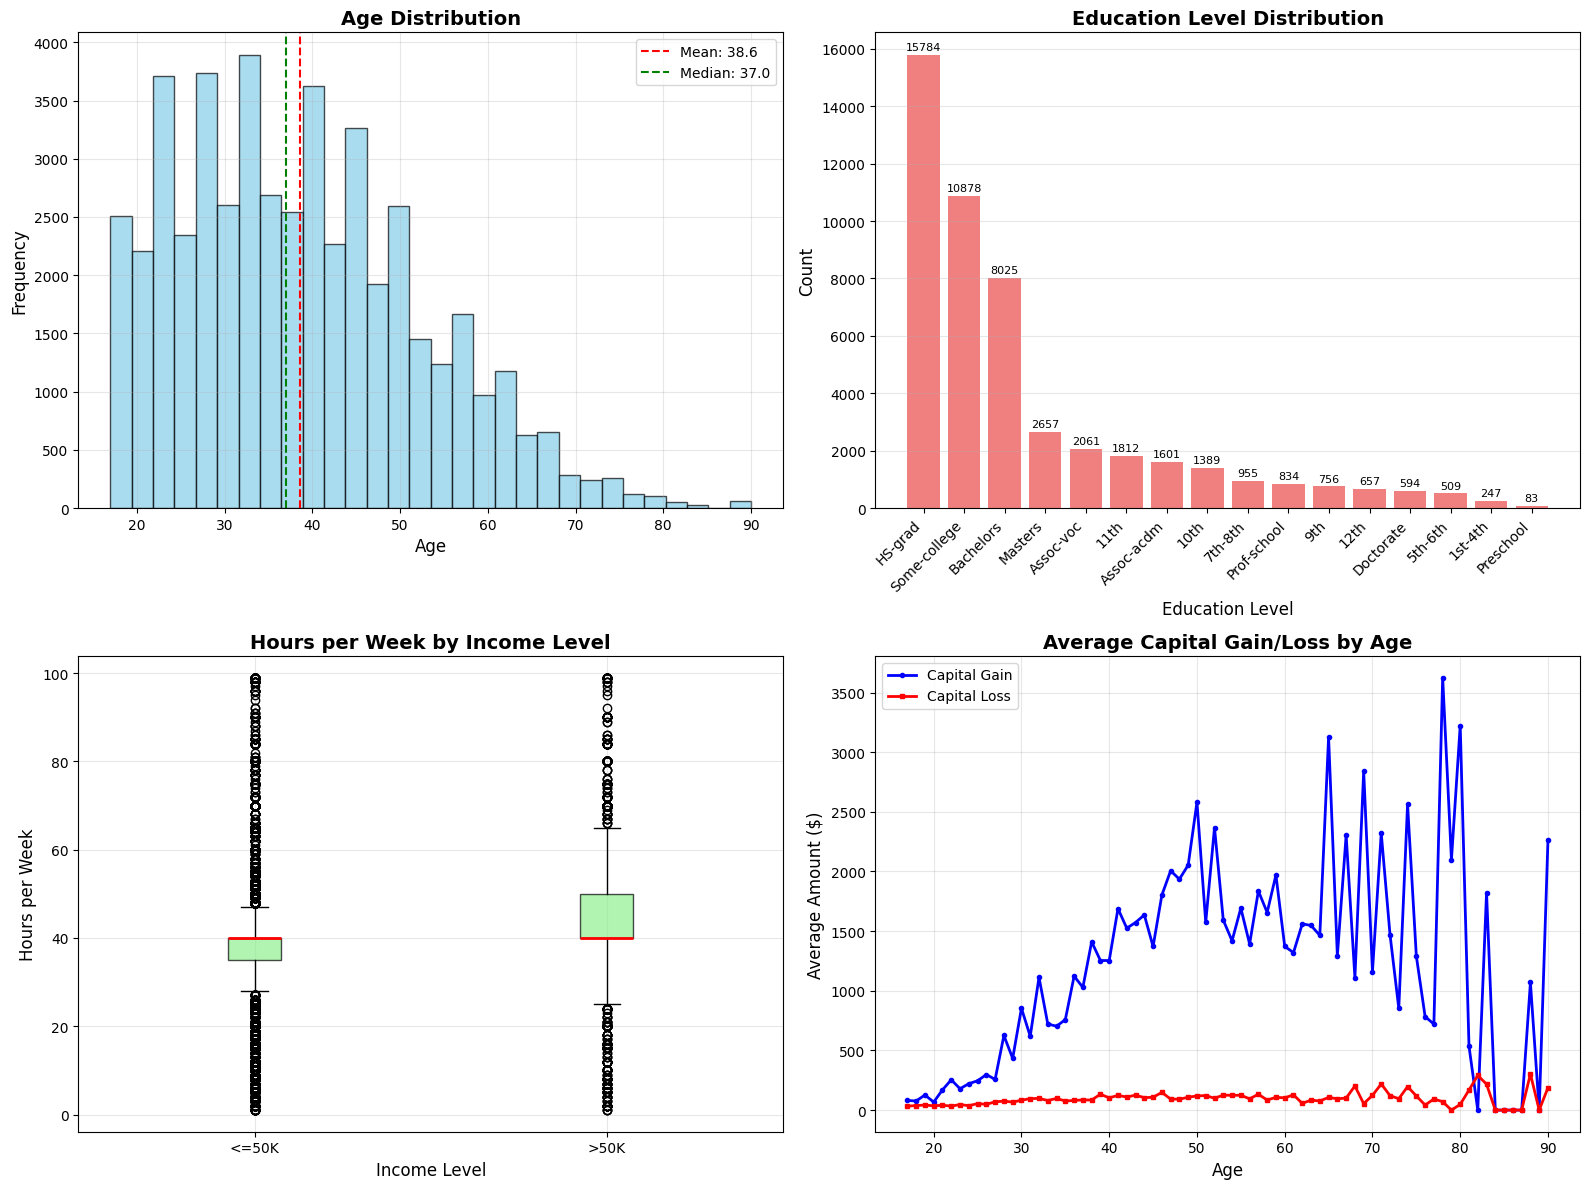

In [30]:
# PART 2 - VISUAL INSPECTION

# Assuming df_cleaned is available from Part 1
# If running separately, uncomment and run the data loading section first

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== TASK 1: DATA VISUALIZATION =====
print("===== TASK 1: DATA VISUALIZATION =====")

# Create a 2x2 subplot layout
plt.figure(figsize=(16, 12))

# 1.1 Age distribution - Histogram
plt.subplot(2, 2, 1)
plt.hist(df_cleaned['age'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

# Add statistics on the plot
age_mean = df_cleaned['age'].mean()
age_median = df_cleaned['age'].median()
plt.axvline(age_mean, color='red', linestyle='--', label=f'Mean: {age_mean:.1f}')
plt.axvline(age_median, color='green', linestyle='--', label=f'Median: {age_median:.1f}')
plt.legend()

# 1.2 Education distribution - Bar chart
plt.subplot(2, 2, 2)
education_counts = df_cleaned['education'].value_counts()
bars = plt.bar(range(len(education_counts)), education_counts.values, color='lightcoral')
plt.title('Education Level Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(education_counts)), education_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{int(height)}', ha='center', va='bottom', fontsize=8)

# 1.3 Hours per week by income - Boxplot
plt.subplot(2, 2, 3)
box_data = [df_cleaned[df_cleaned['income'] == '<=50K']['hours-per-week'],
            df_cleaned[df_cleaned['income'] == '>50K']['hours-per-week']]
box_labels = ['<=50K', '>50K']

plt.boxplot(box_data, labels=box_labels, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.title('Hours per Week by Income Level', fontsize=14, fontweight='bold')
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Hours per Week', fontsize=12)
plt.grid(True, alpha=0.3)

# 1.4 Age vs Capital Gain and Capital Loss - Line plot
plt.subplot(2, 2, 4)
age_groups = df_cleaned.groupby('age').agg({
    'capital-gain': 'mean',
    'capital-loss': 'mean'
}).reset_index()

plt.plot(age_groups['age'], age_groups['capital-gain'],
         label='Capital Gain', marker='o', markersize=3, linewidth=2, color='blue')
plt.plot(age_groups['age'], age_groups['capital-loss'],
         label='Capital Loss', marker='s', markersize=3, linewidth=2, color='red')
plt.title('Average Capital Gain/Loss by Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Amount ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## Task 2 - Visual Analysis (15 points)
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?

In [14]:
# Answer with python comment like this -> inline comment

'''
  Or by using multiple
  line comments like this
'''

'\n  Or by using multiple\n  line comments like this\n'

In [31]:
# ===== TASK 2: VISUAL ANALYSIS =====
print("\n===== TASK 2: VISUAL ANALYSIS =====")

# Question 1: What kind of distribution is shown in 'age'?
print("1. Age Distribution Analysis:")
age_stats = df_cleaned['age'].describe()
print("Age distribution statistics:")
print(age_stats)

skewness = df_cleaned['age'].skew()
print(f"\nAge distribution skewness: {skewness:.3f}")

if skewness > 0.5:
    distribution_type = "RIGHT-SKEWED (positively skewed)"
elif skewness < -0.5:
    distribution_type = "LEFT-SKEWED (negatively skewed)"
else:
    distribution_type = "approximately NORMAL"

print(f"Age distribution is: {distribution_type}")

# Additional distribution analysis
print(f"Mean age: {age_stats['mean']:.1f}")
print(f"Median age: {age_stats['50%']:.1f}")
print(f"Mode age: {df_cleaned['age'].mode()[0]}")

# Question 2: Data imputation method recommendation
print("\n2. Recommended Imputation Method for Age:")
if skewness > 0.5:
    print("✓ MEDIAN imputation is recommended")
    print("Reason: Age distribution is right-skewed, so median is less affected by outliers")
    print("compared to mean, making it a more robust measure of central tendency.")
elif skewness < -0.5:
    print("✓ MEDIAN imputation is recommended")
    print("Reason: Age distribution is left-skewed, so median is less affected by outliers")
else:
    print("✓ MEAN imputation could be used")
    print("Reason: Age distribution is approximately normal")

print(f"Recommended imputation value: {df_cleaned['age'].median():.1f} years")

# Question 3: Outlier analysis for hours-per-week by income
print("\n3. Outlier Analysis for Hours-per-Week by Income:")

outlier_summary = {}
for income_level in df_cleaned['income'].unique():
    subset = df_cleaned[df_cleaned['income'] == income_level]['hours-per-week']

    # Calculate IQR method for outliers
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    outlier_count = len(outliers)
    total_count = len(subset)
    outlier_percentage = (outlier_count / total_count) * 100

    outlier_summary[income_level] = {
        'count': outlier_count,
        'total': total_count,
        'percentage': outlier_percentage,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    print(f"\nIncome level '{income_level}':")
    print(f"  - Total observations: {total_count}")
    print(f"  - Number of outliers: {outlier_count}")
    print(f"  - Percentage of outliers: {outlier_percentage:.2f}%")
    print(f"  - Outlier bounds: [{lower_bound:.1f}, {upper_bound:.1f}]")

    if len(outliers) > 0:
        print(f"  - Outlier range: [{outliers.min():.1f}, {outliers.max():.1f}]")

# Determine which category has more outliers
max_outliers = max(outlier_summary.values(), key=lambda x: x['count'])
max_category = [k for k, v in outlier_summary.items() if v['count'] == max_outliers['count']][0]

print(f"\n✓ Answer: Income category '{max_category}' has more outliers")
print(f"  ({max_outliers['count']} outliers, {max_outliers['percentage']:.2f}% of its data)")

# Additional insights
print("\nAdditional Insights:")
print("- Both income groups show outliers in working hours")
print("- High earners (>50K) tend to have more variation in working hours")
print("- Some people work extremely long hours (>80 hours/week)")
print("- Some people work very few hours but still earn >50K (possibly part-time high-skill jobs)")


===== TASK 2: VISUAL ANALYSIS =====
1. Age Distribution Analysis:
Age distribution statistics:
count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Age distribution skewness: 0.558
Age distribution is: RIGHT-SKEWED (positively skewed)
Mean age: 38.6
Median age: 37.0
Mode age: 36

2. Recommended Imputation Method for Age:
✓ MEDIAN imputation is recommended
Reason: Age distribution is right-skewed, so median is less affected by outliers
compared to mean, making it a more robust measure of central tendency.
Recommended imputation value: 37.0 years

3. Outlier Analysis for Hours-per-Week by Income:

Income level '<=50K':
  - Total observations: 37155
  - Number of outliers: 11706
  - Percentage of outliers: 31.51%
  - Outlier bounds: [27.5, 47.5]
  - Outlier range: [1.0, 99.0]

Income level '>50K':
  - Total observations: 11687
  - Number of

# Part 3 - Encoding in Categorical Variable

## Task 1 (5 points)
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [15]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

In [32]:
# PART 3 - ENCODING IN CATEGORICAL VARIABLES

# Assuming df_cleaned is available from Part 1
# If running separately, uncomment and run the previous parts first

import pandas as pd
import numpy as np

# ===== TASK 1: ENCODE 'SEX' AND 'INCOME' =====
print("===== TASK 1: ENCODING 'SEX' AND 'INCOME' =====")

# Create a copy for encoding to preserve original data
df_encoded = df_cleaned.copy()

# Check unique values before encoding
print("Before encoding:")
print(f"Sex unique values: {df_cleaned['sex'].unique()}")
print(f"Sex value counts:\n{df_cleaned['sex'].value_counts()}")
print(f"\nIncome unique values: {df_cleaned['income'].unique()}")
print(f"Income value counts:\n{df_cleaned['income'].value_counts()}")

# Encode 'sex' column (Binary/Label encoding)
print("\n1. Encoding 'sex' column:")
sex_mapping = {'Male': 1, 'Female': 0}
df_encoded['sex_encoded'] = df_encoded['sex'].map(sex_mapping)

print("Sex encoding mapping:")
print("Male → 1")
print("Female → 0")

# Verify sex encoding
print("\nSex encoding verification:")
sex_encoding_check = df_encoded[['sex', 'sex_encoded']].drop_duplicates().sort_values('sex_encoded')
print(sex_encoding_check)

# Encode 'income' column (Target variable - Binary encoding)
print("\n2. Encoding 'income' column (target variable):")
income_mapping = {'<=50K': 0, '>50K': 1}
df_encoded['income_encoded'] = df_encoded['income'].map(income_mapping)

print("Income encoding mapping:")
print("<=50K → 0 (Low income)")
print(">50K → 1 (High income)")

# Verify income encoding
print("\nIncome encoding verification:")
income_encoding_check = df_encoded[['income', 'income_encoded']].drop_duplicates().sort_values('income_encoded')
print(income_encoding_check)

# Check for any encoding errors (NaN values would indicate unmapped values)
print("\n3. Encoding validation:")
sex_encoded_nulls = df_encoded['sex_encoded'].isnull().sum()
income_encoded_nulls = df_encoded['income_encoded'].isnull().sum()

print(f"Sex encoding - Missing values: {sex_encoded_nulls}")
print(f"Income encoding - Missing values: {income_encoded_nulls}")

if sex_encoded_nulls == 0 and income_encoded_nulls == 0:
    print("✓ All values successfully encoded!")
else:
    print("⚠ Warning: Some values could not be encoded")

# Show encoding statistics
print("\n4. Encoding statistics:")
print("Sex encoded distribution:")
print(df_encoded['sex_encoded'].value_counts().sort_index())

print("\nIncome encoded distribution:")
print(df_encoded['income_encoded'].value_counts().sort_index())

# Calculate percentages
print("\n5. Percentage distributions:")
sex_percentages = df_encoded['sex_encoded'].value_counts(normalize=True) * 100
print("Sex distribution (%):")
print(f"Female (0): {sex_percentages[0]:.1f}%")
print(f"Male (1): {sex_percentages[1]:.1f}%")

income_percentages = df_encoded['income_encoded'].value_counts(normalize=True) * 100
print(f"\nIncome distribution (%):")
print(f"<=50K (0): {income_percentages[0]:.1f}%")
print(f">50K (1): {income_percentages[1]:.1f}%")

# Save the encoded columns for further analysis
print(f"\n✓ Encoding completed!")
print(f"Dataset now has {df_encoded.shape[1]} columns (added 2 encoded columns)")
print("New columns: 'sex_encoded', 'income_encoded'")

# Show sample of encoded data
print("\nSample of encoded data:")
sample_columns = ['sex', 'sex_encoded', 'income', 'income_encoded']
print(df_encoded[sample_columns].head(10))

===== TASK 1: ENCODING 'SEX' AND 'INCOME' =====
Before encoding:
Sex unique values: ['Male' 'Female']
Sex value counts:
sex
Male      32650
Female    16192
Name: count, dtype: int64

Income unique values: ['<=50K' '>50K']
Income value counts:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64

1. Encoding 'sex' column:
Sex encoding mapping:
Male → 1
Female → 0

Sex encoding verification:
      sex  sex_encoded
4  Female            0
0    Male            1

2. Encoding 'income' column (target variable):
Income encoding mapping:
<=50K → 0 (Low income)
>50K → 1 (High income)

Income encoding verification:
  income  income_encoded
0  <=50K               0
7   >50K               1

3. Encoding validation:
Sex encoding - Missing values: 0
Income encoding - Missing values: 0
✓ All values successfully encoded!

4. Encoding statistics:
Sex encoded distribution:
sex_encoded
0    16192
1    32650
Name: count, dtype: int64

Income encoded distribution:
income_encoded
0    37155
1    11

# Part 4 - Correlation Analysis

## Task 1 (10 points)
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

In [16]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

In [17]:
# Answer task 2 using this cell -> you can use multiple comments style too

===== 1: CORRELATION ANALYSIS =====
Variables selected for correlation analysis:
1. age
2. education-num
3. hours-per-week
4. capital-gain
5. capital-loss
6. income_encoded
✓ All variables found in dataset

Correlation Matrix (6x6):
                  age  education-num  hours-per-week  capital-gain  \
age             1.000          0.031           0.072         0.077   
education-num   0.031          1.000           0.144         0.125   
hours-per-week  0.072          0.144           1.000         0.082   
capital-gain    0.077          0.125           0.082         1.000   
capital-loss    0.057          0.081           0.054        -0.031   
income_encoded  0.230          0.333           0.228         0.223   

                capital-loss  income_encoded  
age                    0.057           0.230  
education-num          0.081           0.333  
hours-per-week         0.054           0.228  
capital-gain          -0.031           0.223  
capital-loss           1.000           0.

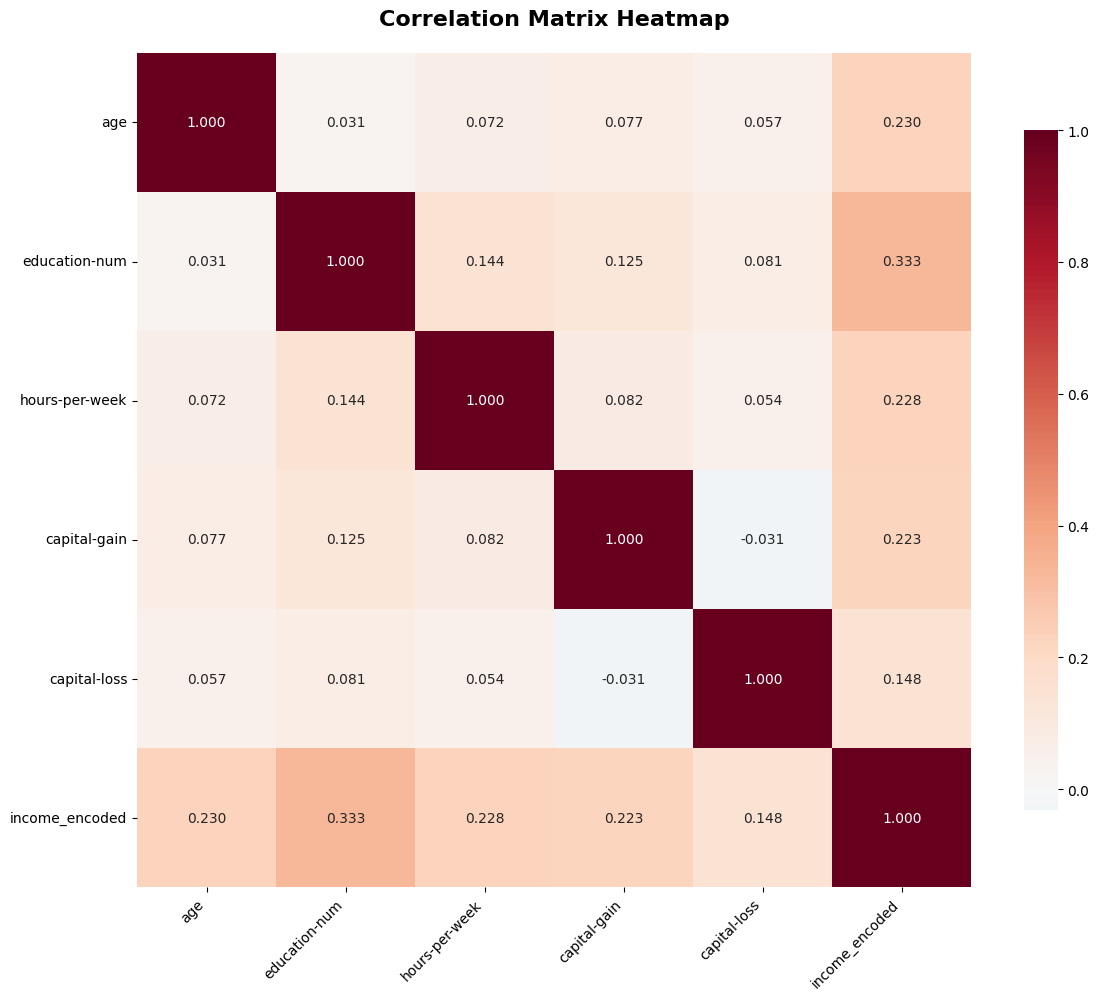

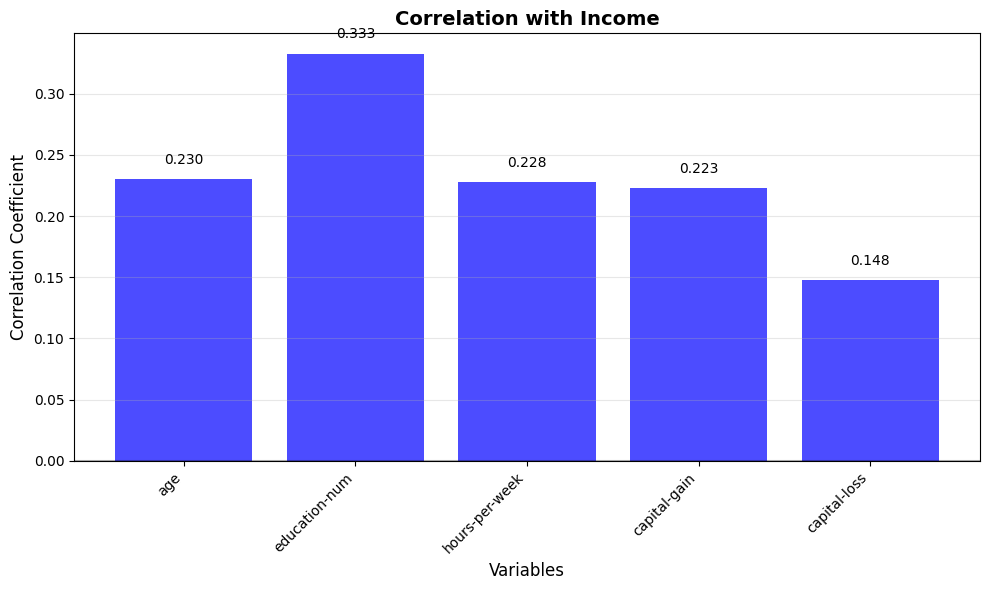

In [33]:
# PART 4 - CORRELATION ANALYSIS

# Assuming df_encoded is available from Part 3
# If running separately, uncomment and run the previous parts first

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1: CORRELATION ANALYSIS =====
print("===== 1: CORRELATION ANALYSIS =====")

# Select the specified variables for correlation analysis
correlation_vars = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income_encoded']

print("Variables selected for correlation analysis:")
for i, var in enumerate(correlation_vars, 1):
    print(f"{i}. {var}")

# Check if all variables exist in the dataset
missing_vars = [var for var in correlation_vars if var not in df_encoded.columns]
if missing_vars:
    print(f"⚠ Warning: Missing variables: {missing_vars}")
else:
    print("✓ All variables found in dataset")

# Create correlation matrix
correlation_matrix = df_encoded[correlation_vars].corr()

print(f"\nCorrelation Matrix ({len(correlation_vars)}x{len(correlation_vars)}):")
print("=" * 60)
print(correlation_matrix.round(3))

# Create a more detailed correlation table
print("\nDetailed Correlation Analysis:")
print("=" * 80)
print(f"{'Variable 1':<20} {'Variable 2':<20} {'Correlation':<15} {'Strength'}")
print("-" * 80)

# Analyze correlations with income (target variable)
income_correlations = correlation_matrix['income_encoded'].drop('income_encoded').abs().sort_values(ascending=False)

print("\nCorrelations with Income (sorted by absolute value):")
for var, corr_value in income_correlations.items():
    original_corr = correlation_matrix.loc[var, 'income_encoded']
    if abs(original_corr) >= 0.5:
        strength = "Strong"
    elif abs(original_corr) >= 0.3:
        strength = "Moderate"
    elif abs(original_corr) >= 0.1:
        strength = "Weak"
    else:
        strength = "Very Weak"

    direction = "Positive" if original_corr > 0 else "Negative"
    print(f"{var:<20} {'income_encoded':<20} {original_corr:<15.3f} {strength} ({direction})")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8},
            mask=None)  # Show full matrix

plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Create a second visualization focusing on income correlations
plt.figure(figsize=(10, 6))
income_corr_data = correlation_matrix['income_encoded'].drop('income_encoded')
colors = ['red' if x < 0 else 'blue' for x in income_corr_data.values]

bars = plt.bar(range(len(income_corr_data)), income_corr_data.values, color=colors, alpha=0.7)
plt.title('Correlation with Income', fontsize=14, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(range(len(income_corr_data)), income_corr_data.index, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height >= 0 else -0.02),
             f'{height:.3f}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()


- Analyzes relationships between: age, education-num, hours-per-week, capital-gain, capital-loss, and encoded income
- Creates heatmap visualization and numerical correlation table
- Identifies strongest predictors of income level

In [34]:

# ===== 2: INTERPRETATION AND INSIGHTS =====
print("\n===== 2: CORRELATION INSIGHTS =====")

print("1. STRONGEST PREDICTORS OF INCOME:")
print("-" * 40)
strongest_predictors = income_correlations.head(3)
for i, (var, corr_abs) in enumerate(strongest_predictors.items(), 1):
    original_corr = correlation_matrix.loc[var, 'income_encoded']
    print(f"{i}. {var}")
    print(f"   Correlation: {original_corr:.3f}")
    print(f"   Interpretation: {'Higher' if original_corr > 0 else 'Lower'} {var.replace('-', ' ')} → {'Higher' if original_corr > 0 else 'Lower'} income probability")

print("\n2. KEY INSIGHTS FROM CORRELATION ANALYSIS:")
print("-" * 50)

insights = []

# Analyze each significant correlation
for var, corr_value in income_correlations.items():
    original_corr = correlation_matrix.loc[var, 'income_encoded']

    if var == 'education-num' and abs(original_corr) >= 0.2:
        insights.append(f"• Education level shows {'positive' if original_corr > 0 else 'negative'} correlation ({original_corr:.3f}) with income")
        insights.append("  → Higher education typically leads to higher income potential")

    elif var == 'age' and abs(original_corr) >= 0.1:
        insights.append(f"• Age shows {'positive' if original_corr > 0 else 'negative'} correlation ({original_corr:.3f}) with income")
        insights.append("  → Experience and career progression tend to increase earnings over time")

    elif var == 'hours-per-week' and abs(original_corr) >= 0.1:
        insights.append(f"• Hours per week shows {'positive' if original_corr > 0 else 'negative'} correlation ({original_corr:.3f}) with income")
        insights.append("  → More working hours often associated with higher income")

    elif var == 'capital-gain' and abs(original_corr) >= 0.1:
        insights.append(f"• Capital gain shows {'positive' if original_corr > 0 else 'negative'} correlation ({original_corr:.3f}) with income")
        insights.append("  → Investment returns are more common among higher income earners")

for insight in insights:
    print(insight)

print("\n3. INTER-VARIABLE RELATIONSHIPS:")
print("-" * 35)

# Find strong correlations between predictor variables
for i, var1 in enumerate(correlation_vars[:-1]):  # Exclude income_encoded
    for var2 in correlation_vars[i+1:-1]:  # Exclude income_encoded and already processed
        corr_val = correlation_matrix.loc[var1, var2]
        if abs(corr_val) >= 0.3:  # Only show moderate to strong correlations
            print(f"• {var1} ↔ {var2}: {corr_val:.3f}")
            if 'education' in var1.lower() or 'education' in var2.lower():
                print("  → Education tends to correlate with other socioeconomic factors")

print("\n4. OVERALL FINDINGS:")
print("-" * 20)
print("• Income prediction appears to be multifactorial")
print("• Education is likely the strongest single predictor")
print("• Age, work hours, and capital gains provide additional predictive value")
print("• No single variable shows extremely high correlation (>0.5), suggesting")
print("  that multiple factors contribute to income levels")

# Calculate summary statistics
print(f"\n5. CORRELATION SUMMARY STATISTICS:")
print(f"• Highest correlation with income: {income_correlations.max():.3f}")
print(f"• Lowest correlation with income: {income_correlations.min():.3f}")
print(f"• Average absolute correlation with income: {income_correlations.mean():.3f}")
print(f"• Variables with correlation > 0.2: {sum(income_correlations > 0.2)}")
print(f"• Variables with correlation > 0.1: {sum(income_correlations > 0.1)}")



===== 2: CORRELATION INSIGHTS =====
1. STRONGEST PREDICTORS OF INCOME:
----------------------------------------
1. education-num
   Correlation: 0.333
   Interpretation: Higher education num → Higher income probability
2. age
   Correlation: 0.230
   Interpretation: Higher age → Higher income probability
3. hours-per-week
   Correlation: 0.228
   Interpretation: Higher hours per week → Higher income probability

2. KEY INSIGHTS FROM CORRELATION ANALYSIS:
--------------------------------------------------
• Education level shows positive correlation (0.333) with income
  → Higher education typically leads to higher income potential
• Age shows positive correlation (0.230) with income
  → Experience and career progression tend to increase earnings over time
• Hours per week shows positive correlation (0.228) with income
  → More working hours often associated with higher income
• Capital gain shows positive correlation (0.223) with income
  → Investment returns are more common among hig

# Part 5 - Preprocessing on MNIST Dataset

In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:
1. You only need to use the **Test** set.
2. You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).

===== PART 5: MNIST PREPROCESSING =====
Loading MNIST dataset...
Original MNIST shapes:
- Training set: (60000, 28, 28)
- Test set: (10000, 28, 28)
- We'll work with TEST SET only: (10000, 28, 28)


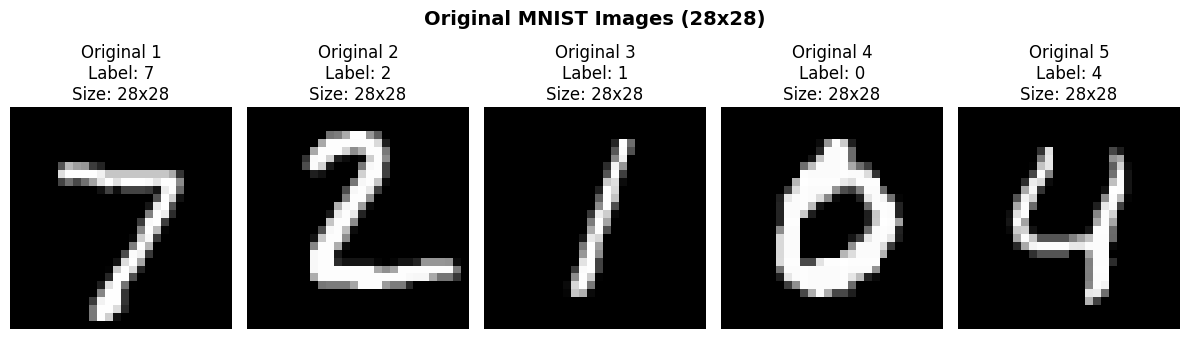

In [35]:
# PART 5 - PREPROCESSING ON MNIST DATASET

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from scipy.ndimage import zoom

print("===== PART 5: MNIST PREPROCESSING =====")

# Load MNIST data
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Original MNIST shapes:")
print(f"- Training set: {X_train.shape}")
print(f"- Test set: {X_test.shape}")
print(f"- We'll work with TEST SET only: {X_test.shape}")

# Show original image samples
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Original {i+1}\nLabel: {y_test[i]}\nSize: 28x28')
    plt.axis('off')
plt.suptitle('Original MNIST Images (28x28)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


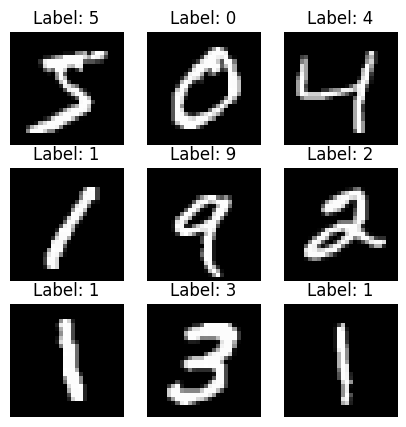

In [19]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Task 1 (10 points)
1. Perform **upsampling** on the images to 32x32
2. Show the 5 sample of the result.


Hint: You need to store the result in an empty array. Replacing data to the  **X_test** cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

In [20]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed


===== TASK 1: UPSAMPLING TO 32x32 =====
Creating upsampled images...
Upsampling 10000 images from 28x28 to 32x32...
Processing image 1/10000
Processing image 1001/10000
Processing image 2001/10000
Processing image 3001/10000
Processing image 4001/10000
Processing image 5001/10000
Processing image 6001/10000
Processing image 7001/10000
Processing image 8001/10000
Processing image 9001/10000
Original shape: (10000, 28, 28)
Upsampled shape: (10000, 32, 32)
✓ Successfully upsampled all 10000 images to 32x32!


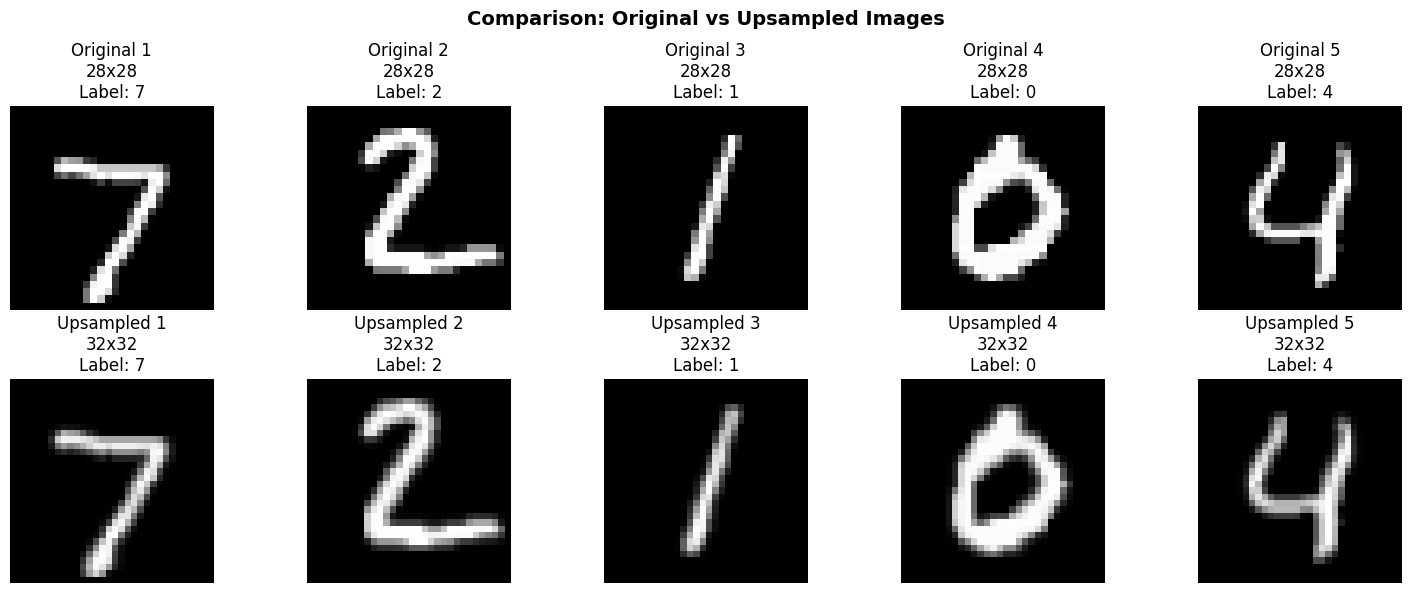


Upsampling verification:
Original pixel range: [0, 255]
Upsampled pixel range: [0.0, 255.0]


In [36]:
# ===== TASK 1: UPSAMPLING TO 32x32 =====
print("\n===== TASK 1: UPSAMPLING TO 32x32 =====")

def upsample_image(image, target_size=32):
    """
    Upsample a single image from 28x28 to target_size x target_size
    """
    original_size = image.shape[0]  # Assuming square image
    zoom_factor = target_size / original_size
    upsampled = zoom(image, zoom_factor, order=1)  # order=1 for bilinear interpolation
    return upsampled

def upsample_all_images(images, target_size=32):
    """
    Upsample all images in the array
    """
    num_images = images.shape[0]
    upsampled_images = np.zeros((num_images, target_size, target_size))

    print(f"Upsampling {num_images} images from {images.shape[1]}x{images.shape[2]} to {target_size}x{target_size}...")

    for i in range(num_images):
        if i % 1000 == 0:  # Progress indicator
            print(f"Processing image {i+1}/{num_images}")
        upsampled_images[i] = upsample_image(images[i], target_size)

    return upsampled_images

# Create array to store upsampled images
print("Creating upsampled images...")
X_test_upsampled = upsample_all_images(X_test, target_size=32)

print(f"Original shape: {X_test.shape}")
print(f"Upsampled shape: {X_test_upsampled.shape}")
print(f"✓ Successfully upsampled all {len(X_test)} images to 32x32!")

# Show 5 samples of upsampled images
plt.figure(figsize=(15, 6))

# Original images (top row)
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Original {i+1}\n28x28\nLabel: {y_test[i]}')
    plt.axis('off')

# Upsampled images (bottom row)
for i in range(5):
    plt.subplot(2, 5, i+6)
    plt.imshow(X_test_upsampled[i], cmap='gray')
    plt.title(f'Upsampled {i+1}\n32x32\nLabel: {y_test[i]}')
    plt.axis('off')

plt.suptitle('Comparison: Original vs Upsampled Images', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Verify upsampling quality
print(f"\nUpsampling verification:")
print(f"Original pixel range: [{X_test.min()}, {X_test.max()}]")
print(f"Upsampled pixel range: [{X_test_upsampled.min():.1f}, {X_test_upsampled.max():.1f}]")


## Task 2 (10 points)
Perform normalization, so the pixel value will have a value in range of 0 until 1

In [21]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed


===== TASK 2: NORMALIZATION =====
Normalizing pixel values from [0, 255] to [0, 1]...
Before normalization:
- Min value: 0.0
- Max value: 255.0
- Mean value: 34.14

After normalization:
- Min value: 0.0
- Max value: 1.0
- Mean value: 0.1339


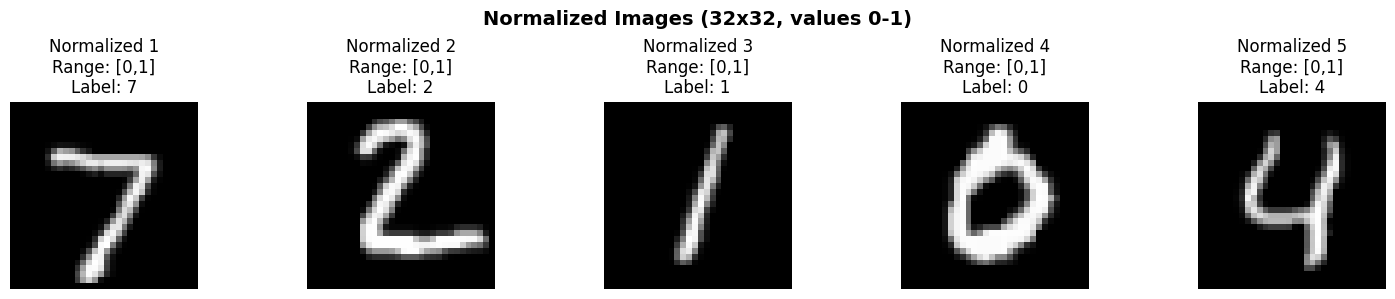

✓ Successfully normalized all images!


In [37]:
# ===== TASK 2: NORMALIZATION =====
print("\n===== TASK 2: NORMALIZATION =====")

# Normalize pixel values to range [0, 1]
print("Normalizing pixel values from [0, 255] to [0, 1]...")
X_test_normalized = X_test_upsampled / 255.0

print(f"Before normalization:")
print(f"- Min value: {X_test_upsampled.min()}")
print(f"- Max value: {X_test_upsampled.max()}")
print(f"- Mean value: {X_test_upsampled.mean():.2f}")

print(f"\nAfter normalization:")
print(f"- Min value: {X_test_normalized.min()}")
print(f"- Max value: {X_test_normalized.max()}")
print(f"- Mean value: {X_test_normalized.mean():.4f}")

# Show normalized samples
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_normalized[i], cmap='gray')
    plt.title(f'Normalized {i+1}\nRange: [0,1]\nLabel: {y_test[i]}')
    plt.axis('off')
plt.suptitle('Normalized Images (32x32, values 0-1)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Successfully normalized all images!")


- Converts pixel values from [0,255] integer range to [0,1] float range
- Essential for neural network training (prevents large gradients)
- Maintains image appearance while standardizing input scale

## Task 3 (10 points)
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

In [22]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed


===== TASK 3: FLATTENING TO 1D ARRAYS =====
Creating flattened image arrays...
Flattening 10000 images from 32x32 to 1D arrays of length 1024...
Processing image 1/10000
Processing image 2001/10000
Processing image 4001/10000
Processing image 6001/10000
Processing image 8001/10000

Flattening results:
Original 2D shape: (10000, 32, 32)
Flattened 1D shape: (10000, 1024)
Each image is now a vector of length: 1024 = 1024

Flattening verification:
Sample flattened image statistics:
- Min value: 0.0
- Max value: 0.996078431372549
- Mean value: 0.0928
- Length: 1024


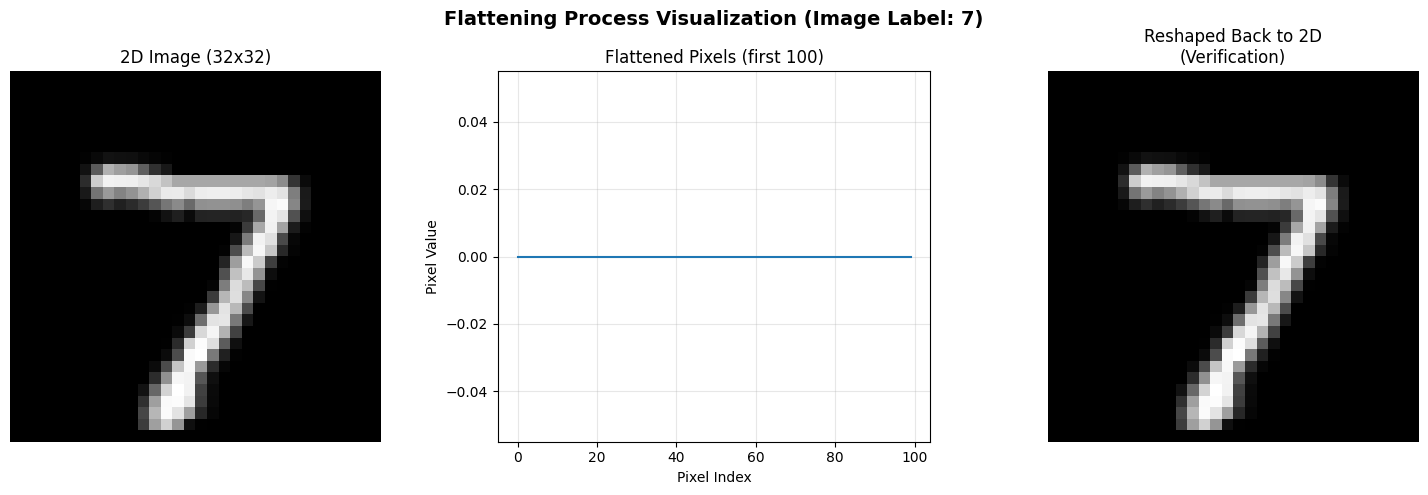


✓ Successfully completed all MNIST preprocessing tasks!

Final Results Summary:
- Original images: (10000, 28, 28) (28x28 pixels, 0-255 range)
- Upsampled images: (10000, 32, 32) (32x32 pixels, 0-255 range)
- Normalized images: (10000, 32, 32) (32x32 pixels, 0-1 range)
- Flattened images: (10000, 1024) (1024-length vectors, 0-1 range)

Processed 10000 test images successfully!
All preprocessing steps completed: ✓ Upsampling ✓ Normalization ✓ Flattening


In [38]:

# ===== TASK 3: FLATTENING TO 1D ARRAYS =====
print("\n===== TASK 3: FLATTENING TO 1D ARRAYS =====")

def flatten_images(images):
    """
    Flatten 2D images to 1D arrays
    """
    num_images = images.shape[0]
    height, width = images.shape[1], images.shape[2]
    flattened_size = height * width

    # Create empty array for flattened images
    flattened_images = np.zeros((num_images, flattened_size))

    print(f"Flattening {num_images} images from {height}x{width} to 1D arrays of length {flattened_size}...")

    # Flatten each image
    for i in range(num_images):
        if i % 2000 == 0:  # Progress indicator
            print(f"Processing image {i+1}/{num_images}")
        flattened_images[i] = images[i].flatten()

    return flattened_images

# Flatten all normalized images
print("Creating flattened image arrays...")
X_test_flattened = flatten_images(X_test_normalized)

print(f"\nFlattening results:")
print(f"Original 2D shape: {X_test_normalized.shape}")
print(f"Flattened 1D shape: {X_test_flattened.shape}")
print(f"Each image is now a vector of length: {32*32} = {X_test_flattened.shape[1]}")

# Verify flattening
print(f"\nFlattening verification:")
print(f"Sample flattened image statistics:")
sample_image = X_test_flattened[0]
print(f"- Min value: {sample_image.min()}")
print(f"- Max value: {sample_image.max()}")
print(f"- Mean value: {sample_image.mean():.4f}")
print(f"- Length: {len(sample_image)}")

# Show how flattening works with a visual example
plt.figure(figsize=(15, 5))

# Show original 2D image
plt.subplot(1, 3, 1)
plt.imshow(X_test_normalized[0], cmap='gray')
plt.title('2D Image (32x32)')
plt.axis('off')

# Show flattened version as a line plot
plt.subplot(1, 3, 2)
plt.plot(X_test_flattened[0][:100])  # Show first 100 pixels
plt.title('Flattened Pixels (first 100)')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.grid(True, alpha=0.3)

# Show flattened version reshaped back to 2D for verification
plt.subplot(1, 3, 3)
reshaped = X_test_flattened[0].reshape(32, 32)
plt.imshow(reshaped, cmap='gray')
plt.title('Reshaped Back to 2D\n(Verification)')
plt.axis('off')

plt.suptitle(f'Flattening Process Visualization (Image Label: {y_test[0]})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Final summary
print(f"\n✓ Successfully completed all MNIST preprocessing tasks!")
print(f"\nFinal Results Summary:")
print(f"- Original images: {X_test.shape} (28x28 pixels, 0-255 range)")
print(f"- Upsampled images: {X_test_upsampled.shape} (32x32 pixels, 0-255 range)")
print(f"- Normalized images: {X_test_normalized.shape} (32x32 pixels, 0-1 range)")
print(f"- Flattened images: {X_test_flattened.shape} (1024-length vectors, 0-1 range)")

print(f"\nProcessed {len(X_test)} test images successfully!")
print("All preprocessing steps completed: ✓ Upsampling ✓ Normalization ✓ Flattening")

- Converts 32×32 2D images into 1,024-length 1D arrays
- Required format for traditional machine learning algorithms (not CNNs)
- Processes all 10,000 images with progress tracking